In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import scipy
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(0)
plt.style.use('fivethirtyeight')

In [2]:
demographics_df = pd.read_csv("demographics.csv").assign(
    income=lambda x: x.income.str.replace(",", "").astype(int),
    pop=lambda x: x["pop"].str.replace(",", "").astype(float),
)
features = [
    "hispanic_or_latino",
    "white",
    "black",
    "native_american",
    "asian",
    "nhpi",
    "other",
    "two_or_more",
    "income",
    "foreign_born",
    "sex_ratio",
    "bachelors",
    "age",
]
X = demographics_df[features]
y = demographics_df["margin"]
features

['hispanic_or_latino',
 'white',
 'black',
 'native_american',
 'asian',
 'nhpi',
 'other',
 'two_or_more',
 'income',
 'foreign_born',
 'sex_ratio',
 'bachelors',
 'age']

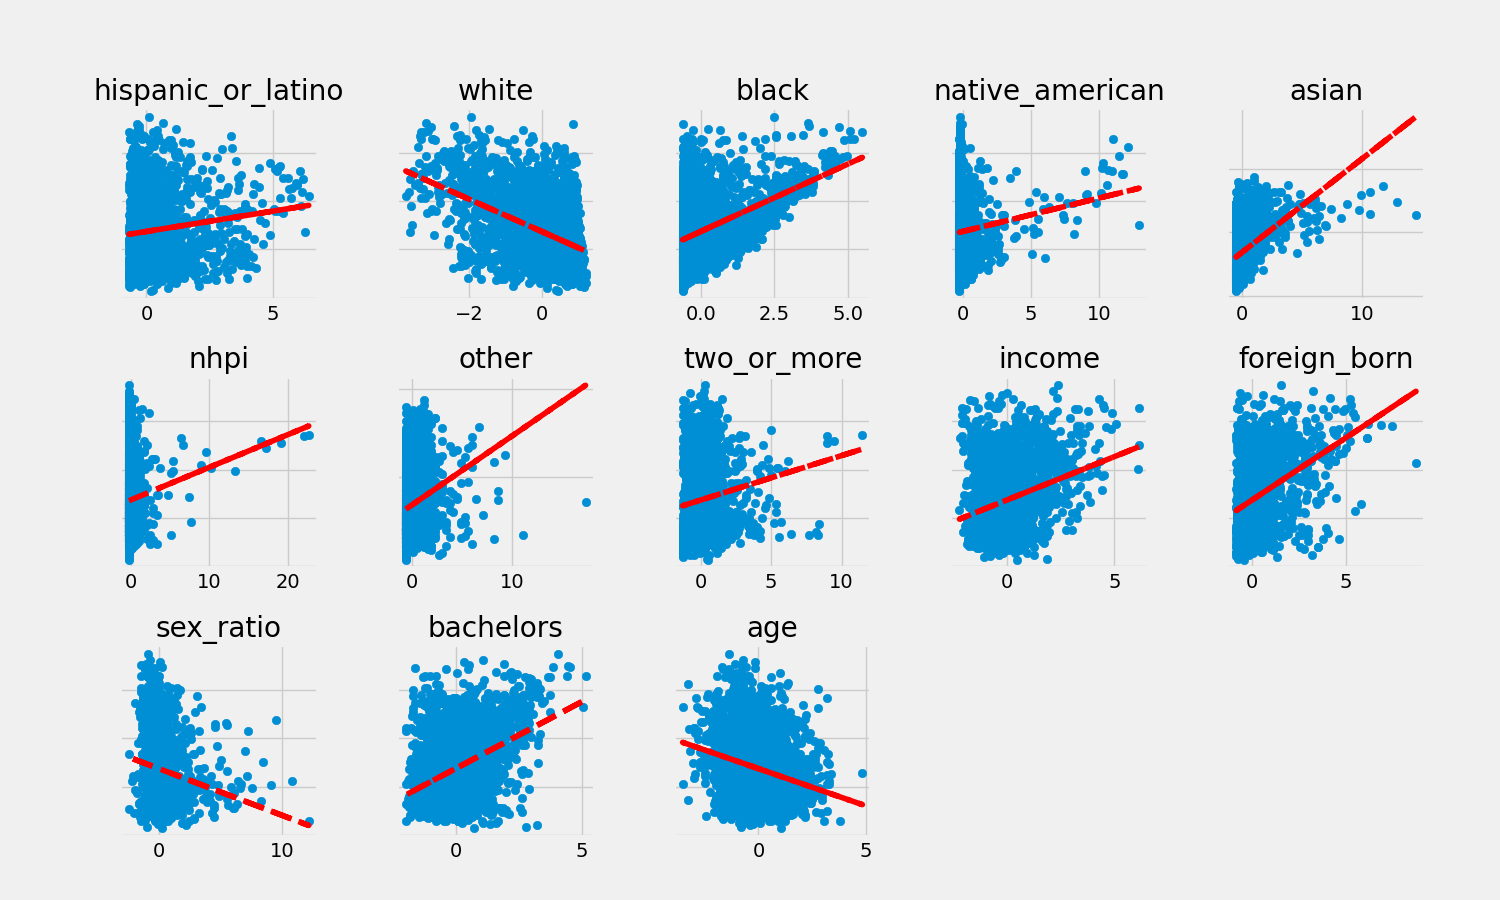

In [3]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
axes[2, 4].axis('off')
axes[2, 3].axis('off')
r_values = []
slopes = []


for i, feature in enumerate(features):
    ax = axes[i // 5, i % 5]
    x = StandardScaler().fit_transform(demographics_df[feature].to_numpy().reshape(-1, 1))
    y = demographics_df["margin"]
    z = np.polyfit(x.flatten(), y, 1)
    p = np.poly1d(z)
    slope, _, r_value, _, _ = scipy.stats.linregress(x.flatten(), y)
    ax.scatter(x, y)
    ax.plot(x, p(x), "r--")
    ax.set_title(feature)
    ax.set_yticklabels([])

    slopes.append(slope)
    r_values.append(r_value)

In [4]:
corr_df = pd.DataFrame({"feature": features, "slope": slopes, "R^2": np.power(r_values, 2)}).sort_values("R^2", ascending=False)
corr_df

,feature,slope,R^2
1,white,-0.166991,0.270265
4,asian,0.147366,0.210476
2,black,0.139038,0.187357
11,bachelors,0.137944,0.184422
9,foreign_born,0.128547,0.160150
8,income,0.089494,0.077624
6,other,0.077733,0.058562
12,age,-0.076981,0.057435
10,sex_ratio,-0.048335,0.022642
7,two_or_more,0.045889,0.020409
